<a href="https://colab.research.google.com/github/ricecakeblack/DataScience/blob/master/breast_cancer_with_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = load_breast_cancer()
X = dataset.data
Y = dataset.target
COL = dataset.feature_names

cancer_df = pd.DataFrame(data=X, columns=COL)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# target값이 악성과 양성의 갯수가 어떻게 될까?
cancer_df['label'] = Y
cancer_df['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

## EDA

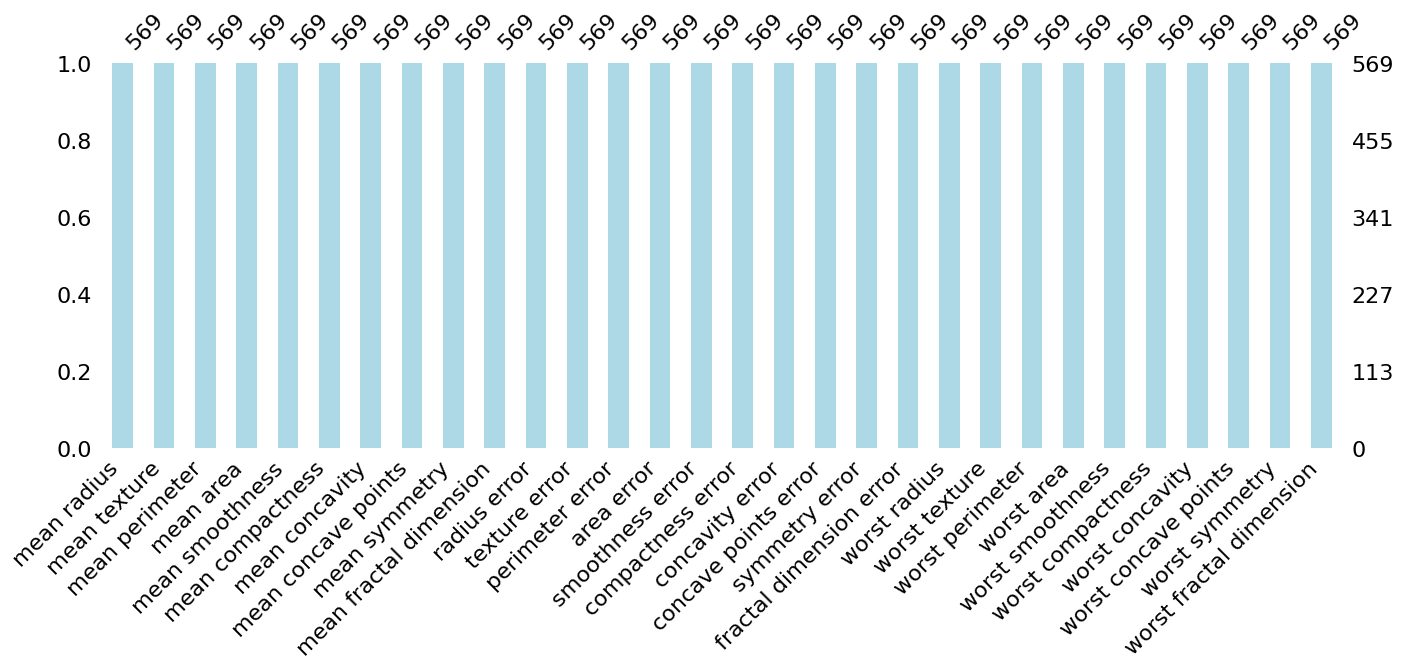

In [ ]:
import missingno as msno

# 정상적인 데이터의 갯수 확인하기
msno.bar(cancer_df, figsize=(16,5), color = 'lightblue')
plt.show()

### 결측치를 만들어봅시다.

In [ ]:
temp_df = cancer_df.copy()
temp_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# 결측치 만들기
temp_df.loc[temp_df['mean radius']==19.69, ['mean radius']]=np.nan
temp_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,NaN,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<Axes: >

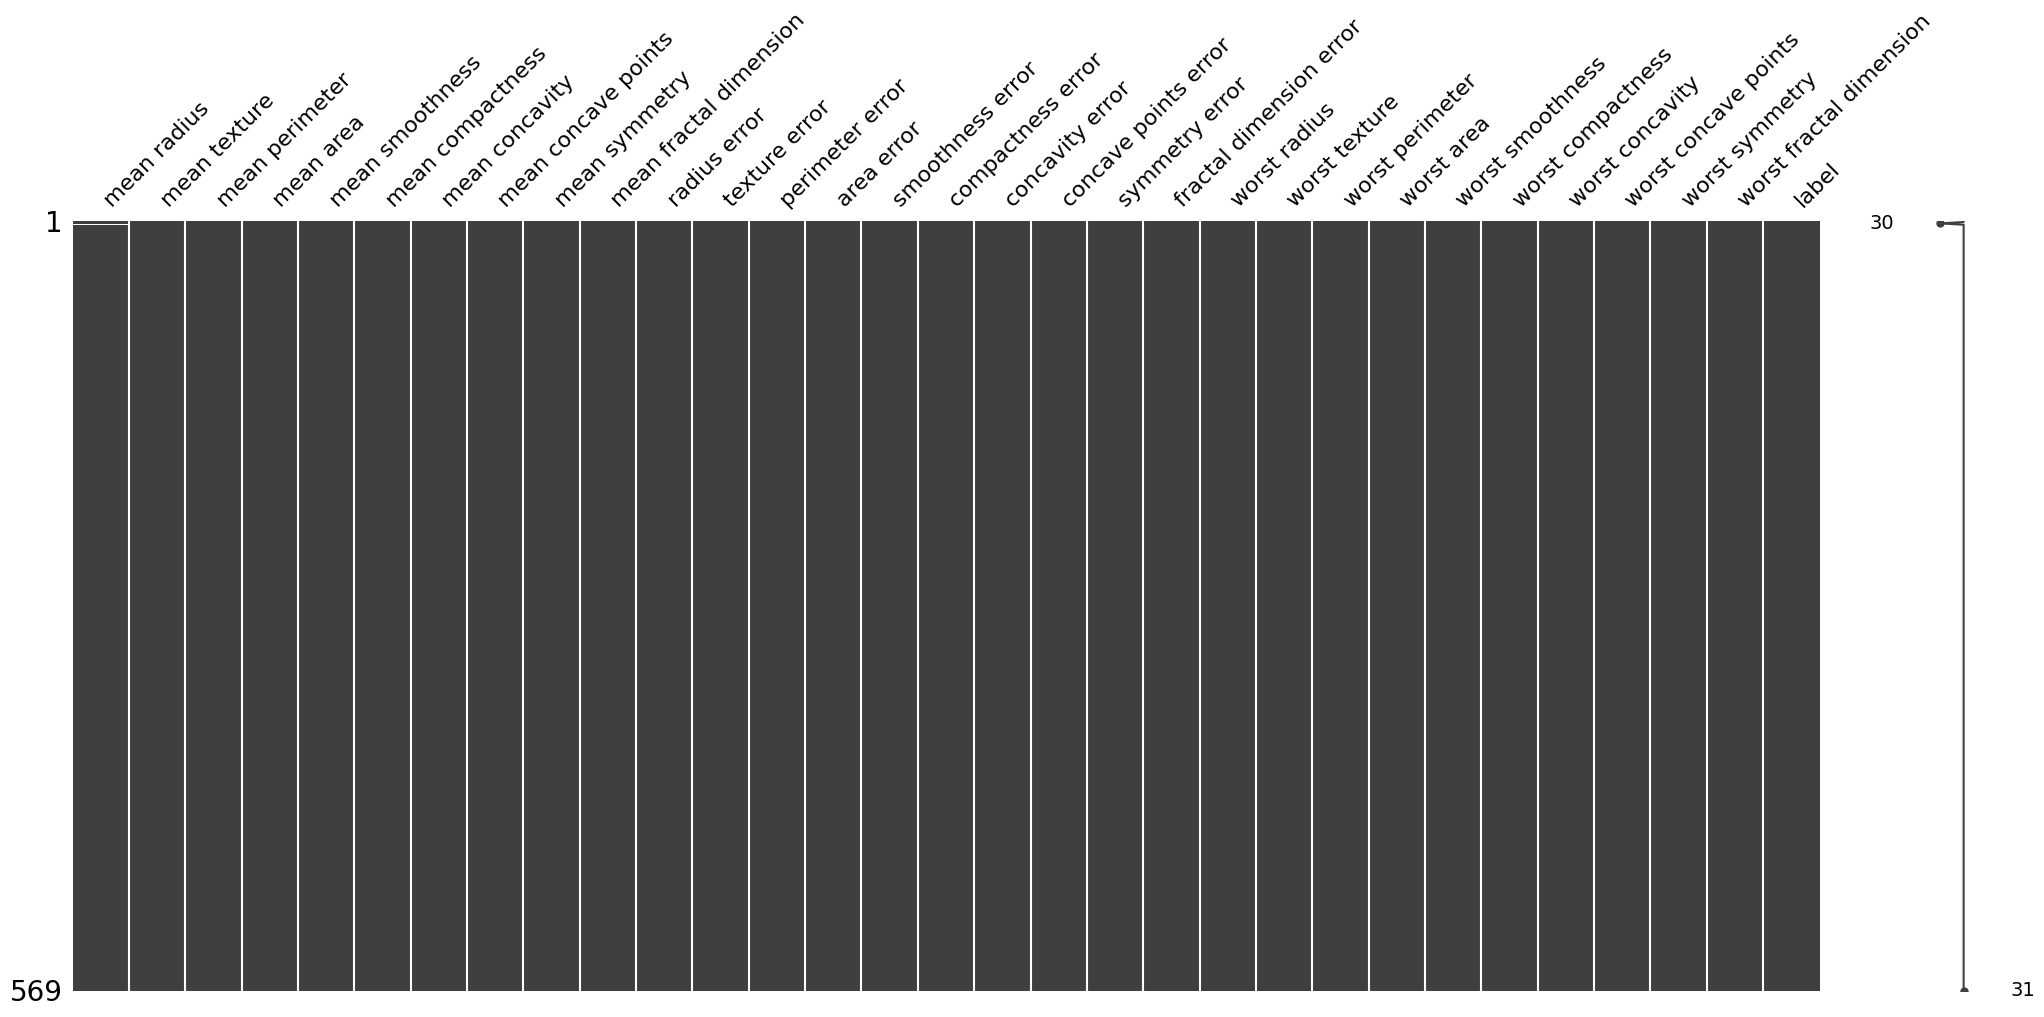

In [ ]:
# 결측치의 위치 표시하기
msno.matrix(temp_df)

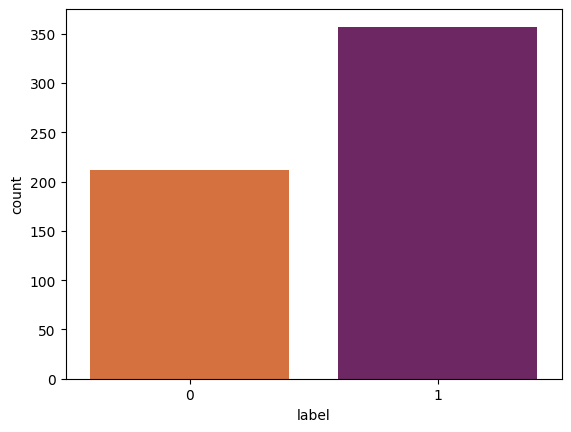

In [ ]:
sns.countplot(data=cancer_df, x='label', palette='inferno_r')
plt.show()

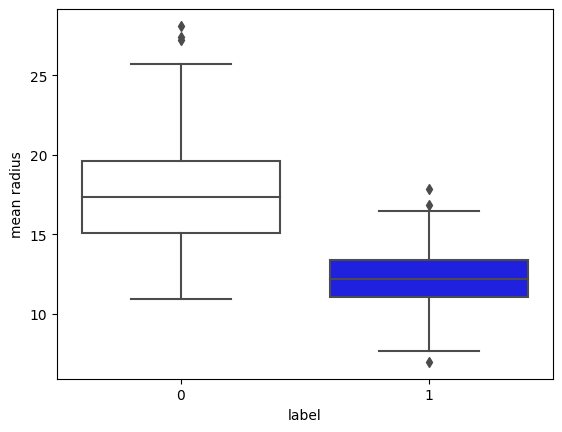

In [ ]:
sns.boxplot(data=cancer_df, x='label', y='mean radius',palette='flag')
plt.show()

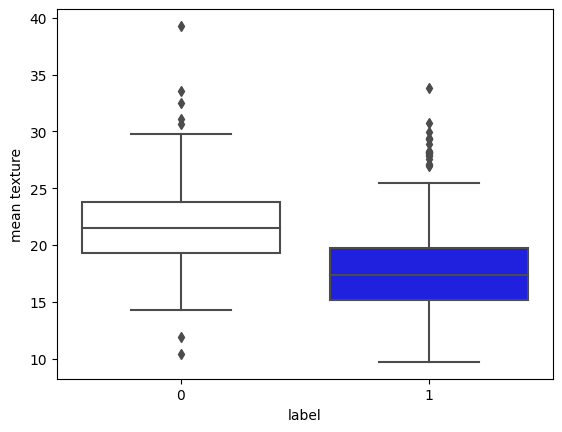

In [ ]:
sns.boxplot(data=cancer_df, x='label', y='mean texture',palette='flag')
plt.show()

In [ ]:
cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

In [ ]:
# 컬럼명에 공백이 있어 컬럼명을 서술하는데 어려움이 많아 공백을 '_'로 변경
cancer_df.columns = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'label']

In [ ]:
import plotly.express as px
px.histogram(data_frame=cancer_df, x=cancer_df.mean_concavity, color='label', color_discrete_sequence=['#A865C9','#f6abb6'])

In [ ]:
test_size=0.2

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(cancer_df.drop('label', axis=1), cancer_df['label'], test_size=test_size, stratify=cancer_df['label'])
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb_model  = XGBClassifier(n_jobs = -1)
params = { 'n_estimators' : [50, 100, 200, 400],
           'max_depth' : [3, 4, 5, 6, 7, 8]
            }
grid_xgb = GridSearchCV(xgb_model, param_grid=params, cv=3, refit=True)
grid_xgb.fit(x_train, y_train)

scores_df = pd.DataFrame(grid_xgb.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1],test_size=0.2)

lr = LogisticRegression()
knn = KNeighborsClassifier()

vo = VotingClassifier([("lr", lr), ("knn", knn)], voting="soft")

vo.fit(X_train, y_train)
y_pred = vo.predict(X_test)

print("acc : {}".format(accuracy_score(y_test, y_pred)))

for clf in [lr, knn]:
    clf_name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("{}'s acc : {}'".format(clf_name,acc))

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler1 = StandardScaler()
scaler2 = StandardScaler()

X_train = scaler1.fit_transform(X_train)
X_test = scaler2.fit_transform(X_test)

lr = LogisticRegression()
knn = KNeighborsClassifier()

vo = VotingClassifier([("lr", lr), ("knn", knn)], voting="soft")

vo.fit(X_train, y_train)
y_pred = vo.predict(X_test)

print("acc : {}".format(accuracy_score(y_test, y_pred)))

for clf in [lr, knn]:
    clf_name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("{}'s acc : {}'".format(clf_name,acc))